In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("../../data/listeners_data.csv")
df_new = df.iloc[15:,:]
df_new.head()

,Date,Azahriah,Pogány Induló,Elefánt,Moriones,Beton.Hofi,Co Lee,Balkan VIP,Carson Coma,Krúbi,...,G.w.M,VZS,Kollár-Klemencz László,Csernovszky Márk,Tankcsapda,Honeybeast,Lóci Játszik,NLP,bongor,Mikee Mykanic
15,2024-10-22,699431,343418,114717,285391,319871,121678,15724.0,172344.0,179068.0,...,62019.0,205059.0,26246.0,3191.0,184778.0,82929.0,82929.0,11330.0,22744.0,48729.0
16,2024-10-24,699978,343710,113319,285713,320796,121104,15594.0,171119.0,181897.0,...,61551.0,214075.0,26134.0,3380.0,183567.0,83323.0,83323.0,11466.0,23059.0,49043.0
17,2024-10-25,700744,344038,113302,286599,320836,120497,15587.0,170620.0,182578.0,...,61322.0,218066.0,26043.0,3486.0,183559.0,83650.0,83650.0,11469.0,23251.0,48944.0
18,2024-10-26,699701,344089,113417,286052,320258,120121,15614.0,169863.0,183023.0,...,60968.0,221392.0,25887.0,3598.0,182588.0,84022.0,84022.0,11491.0,23461.0,48773.0
19,2024-10-27,699131,343475,113616,285831,319899,119293,15452.0,169190.0,183412.0,...,60772.0,225920.0,25739.0,3807.0,181458.0,85036.0,85036.0,11582.0,24200.0,48655.0


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_biggest_gainers(df, top_n=5):
    """Plots the top N artists with the highest percentage increase relative to the first day using a line graph."""
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
    pct_df = (df / df.iloc[0]) * 100  # Convert all values to percentage relative to the first row
    last_day_pct_change = pct_df.iloc[-1]  # Get last day's percentage change
    gainers = last_day_pct_change.nlargest(top_n).index  # Get top N gainers' names

    plt.figure(figsize=(10, 5))
    for artist in gainers:
        plt.plot(df.index, pct_df[artist], label=artist)  # Line plot with markers

    plt.title(f"Top {top_n} Biggest Gainers in Listeners Over Time")
    plt.ylabel("Percentage Change (%)")
    plt.xlabel("Days")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def plot_biggest_losers(df, top_n=5):
    """Plots the top N artists with the highest percentage decrease relative to the first day using a line graph."""
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric
    pct_df = (df / df.iloc[0]) * 100  # Convert all values to percentage relative to the first row
    last_day_pct_change = pct_df.iloc[-1]  # Get last day's percentage change
    losers = last_day_pct_change.nsmallest(top_n).index  # Get top N losers' names

    plt.figure(figsize=(10, 5))
    for artist in losers:
        plt.plot(df.index, pct_df[artist], label=artist)  # Line plot with markers

    plt.title(f"Top {top_n} Biggest Losers in Listeners Over Time")
    plt.ylabel("Percentage Change (%)")
    plt.xlabel("Days")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

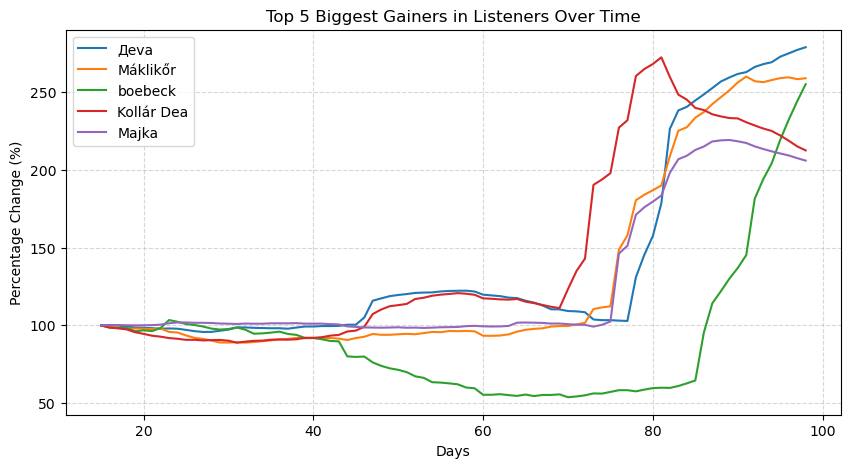

In [26]:
plot_biggest_gainers(df_new)

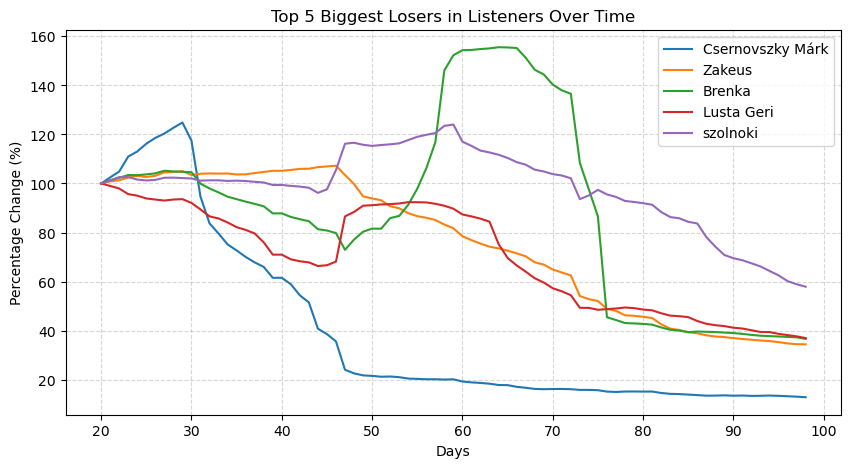

In [23]:
plot_biggest_losers(df_new)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_artist_trends(df, artists, percentage=False):
    """
    Plots listener trends over time for the given list of artists.
    
    Parameters:
    - df (pd.DataFrame): DataFrame where columns are artists, rows are days, and values are listeners.
    - artists (list of str): List of artist names to plot.
    - percentage (bool): If True, plot as percentage relative to each artist's first available value. 
                         If False, plot actual listener numbers.
    """
    df = df.apply(pd.to_numeric, errors='coerce')  # Convert text numbers to numeric
    
    plt.figure(figsize=(10, 5))
    
    for artist in artists:
        if artist in df.columns:
            artist_data = df[artist].dropna()  # Remove NaNs at the beginning for proper normalization
            
            if percentage:
                first_value = artist_data.iloc[0]  # First non-NaN value
                artist_data = (artist_data / first_value) * 100  # Convert to percentage
            
            plt.plot(artist_data.index, artist_data, label=artist)  # Line plot
    
    plt.title("Listener Trends Over Time")
    plt.xlabel("Days")
    plt.ylabel("Percentage Change (%)" if percentage else "Number of Listeners")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

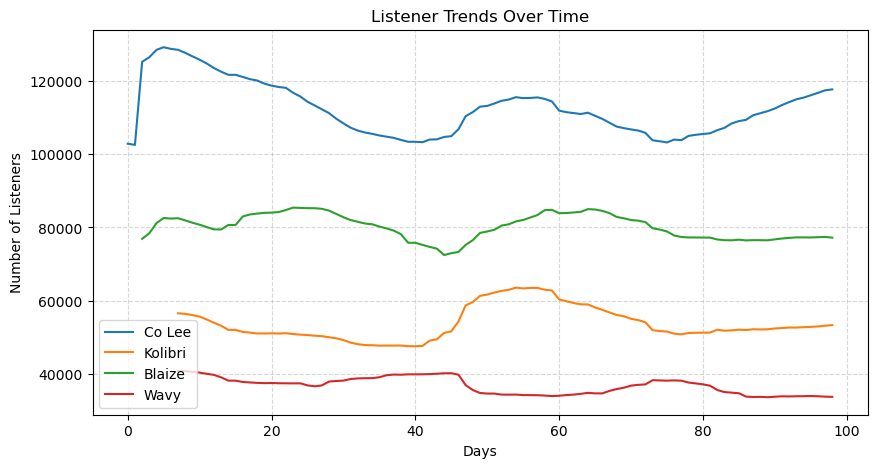

In [ ]:
plot_artist_trends(df,["Co Lee", "Kolibri", "Blaize", "Wavy", "Tembo"],percentage=False)

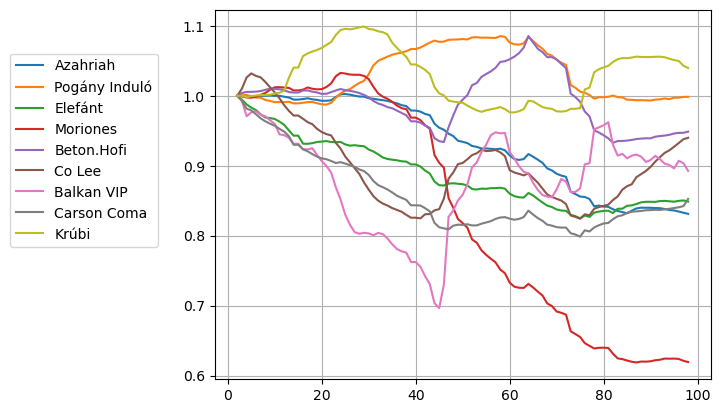

In [ ]:
plt.plot(df_new.iloc[:,1:].astype(int)/df_new.iloc[0,1:].astype(int))
plt.legend(df.columns[1:],bbaox_to_anchor=(-0.1, 0.9))
plt.grid()
plt.show()